<a href="https://colab.research.google.com/github/minhngan123/PredictStudentResult/blob/main/PredictStudentResult_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries


In [ ]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import sklearn



In [ ]:
# Import data from source
df = pd.read_csv("/content/data.csv")

# **1. EDA**

## **1.1. Information about data in DataFrame**

In [ ]:
df.shape

(395, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Create column 'Grade_status' from column 'G3' with the number of students whose final grade is lower than 12 as failing (0) and greater than or equal to 12 as passing (1)

In [ ]:
df['Grade_status'] = df['G3'].apply(lambda x: 0 if x < 12 else 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        395 non-null    object
 1   sex           395 non-null    object
 2   age           395 non-null    int64 
 3   address       395 non-null    object
 4   famsize       395 non-null    object
 5   Pstatus       395 non-null    object
 6   Medu          395 non-null    int64 
 7   Fedu          395 non-null    int64 
 8   Mjob          395 non-null    object
 9   Fjob          395 non-null    object
 10  reason        395 non-null    object
 11  guardian      395 non-null    object
 12  traveltime    395 non-null    int64 
 13  studytime     395 non-null    int64 
 14  failures      395 non-null    int64 
 15  schoolsup     395 non-null    object
 16  famsup        395 non-null    object
 17  paid          395 non-null    object
 18  activities    395 non-null    object
 19  nursery 

There are 395 rows, no columns are missing value

Various data type: int, object

According to the data dictionary, we know that if marked as 1, student passed. Clearly the number 1 or 0 is a flag for the student's passing. Yet data type of the column is int64, which is numerical type. We can change that with the following command.


### Switch to categorical

In [ ]:
df['Grade_status'] = df['Grade_status'].astype('category')

In [ ]:
features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

def convert_cat(df, features):
  for features in features:
    df[features] = df[features].astype('category')
convert_cat(df, features)

Categorical: Grade_status, school, sex, address, famsize, Pstatus,, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic

Numerical: age, Medu, Fedu, traveltime, studytime,  failures, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2




## **1.2. Distribution feature values**

### **1.2.1. Distribution of Numerical feature values**

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### **1.2.2. Distribution of Categorical feature values**

In [ ]:
df.describe(include=['category'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Grade_status
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no,0
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263,233


### **1.2.3. Data Visualization**

**Target Variable**: G3

Want to know the number and percentage of students passing or failing in the last semester

In [ ]:
df['Grade_status']. value_counts().to_frame()

,Grade_status
Fail,233
Pass,162


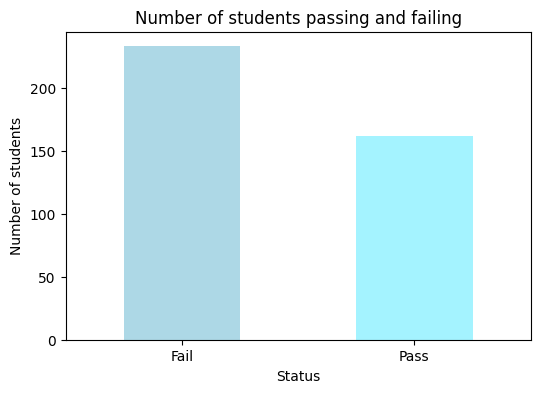

In [ ]:
df['Grade_status'] = df['Grade_status'].replace({0: 'Fail', 1: 'Pass'})

# Column chart for the number of students passing and failing
plt.figure(figsize=(6, 4))
df['Grade_status'].value_counts().plot(kind='bar', color=['lightblue', '#a4f3ff'])
plt.title('Number of students passing and failing')
plt.xlabel('Status')
plt.ylabel('Number of students')
plt.xticks(rotation=0)
plt.show()


In [ ]:
df['Grade_status']. value_counts(normalize=True).to_frame()

,Grade_status
Fail,0.589873
Pass,0.410127


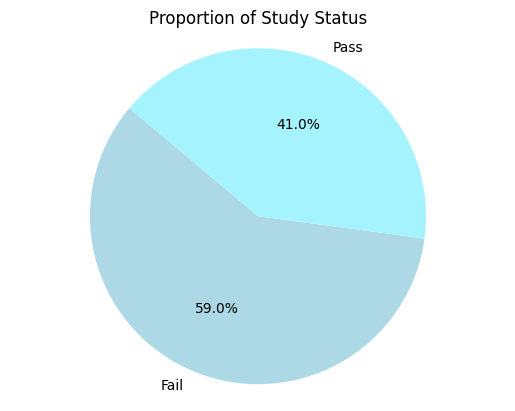

In [ ]:
# Create a Series with the proportions of values in the "Grade_status" column
value_counts = df['Grade_status'].value_counts()

# Get the list of values
labels = ['Fail','Pass']

# Get the list of proportions
sizes = value_counts.values

# Colors for the elements in the pie chart
colors = ['lightblue', '#a4f3ff']

# Draw the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Ensure the pie chart is circular
plt.title('Proportion of Study Status')
plt.show()


Class "0" is the number of students who failed, Class "1" is the number of students who passed. We see that 233 students failed at the end of the term (equivalent to 58.99%), 162 students passed at the end of the term (equivalent to 41.01%).

So the training data suffers from data imbalance but it is not severe which is why I will not consider techniques like sampling to tackle the imbalance.


#### **1.2.3.1. Visualization of Numerical Feature**s

age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2

In [ ]:
pip install seaborn

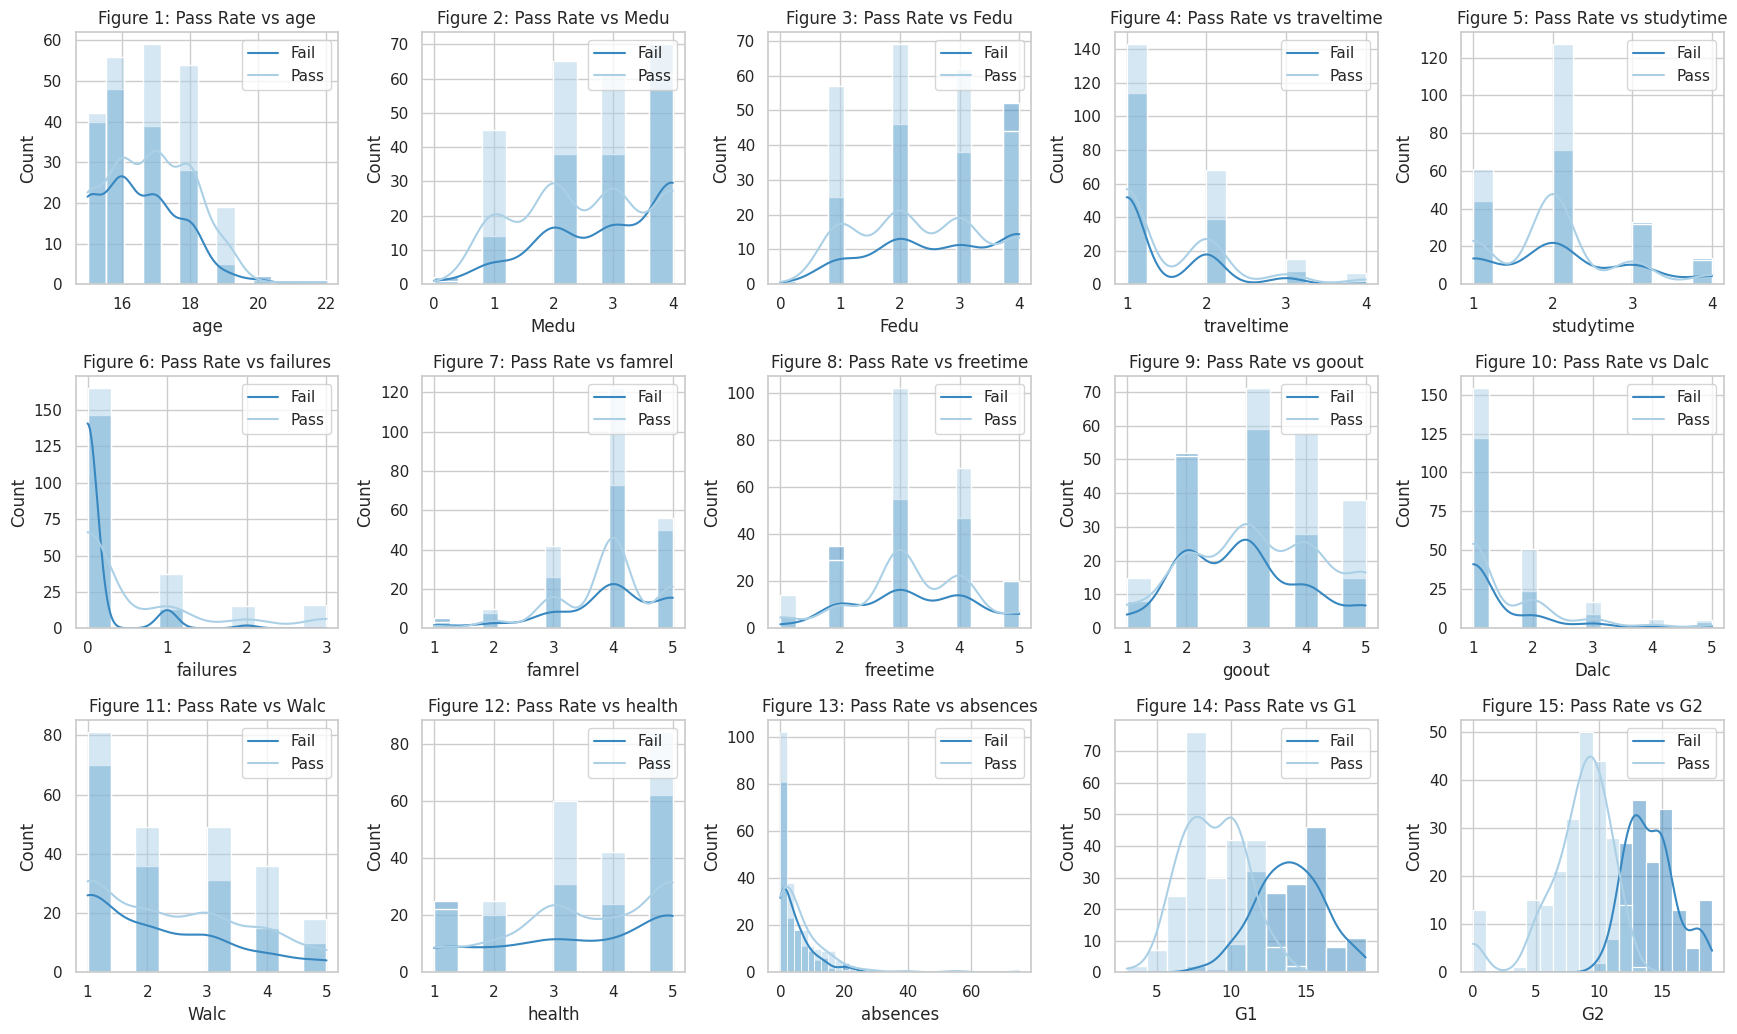

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

n_rows = 3
n_cols = 5

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(cols):
            ax_i = ax[r, c]
            sns.histplot(data=df, x=cols[i], hue='Grade_status', palette='Blues', ax=ax_i, kde=True)
            ax_i.set_title(f"Figure {i+1}: Pass Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Fail', 'Pass'])



plt.tight_layout()
plt.show()

#### **1.2.3.2. Visualization of Categorical Features**

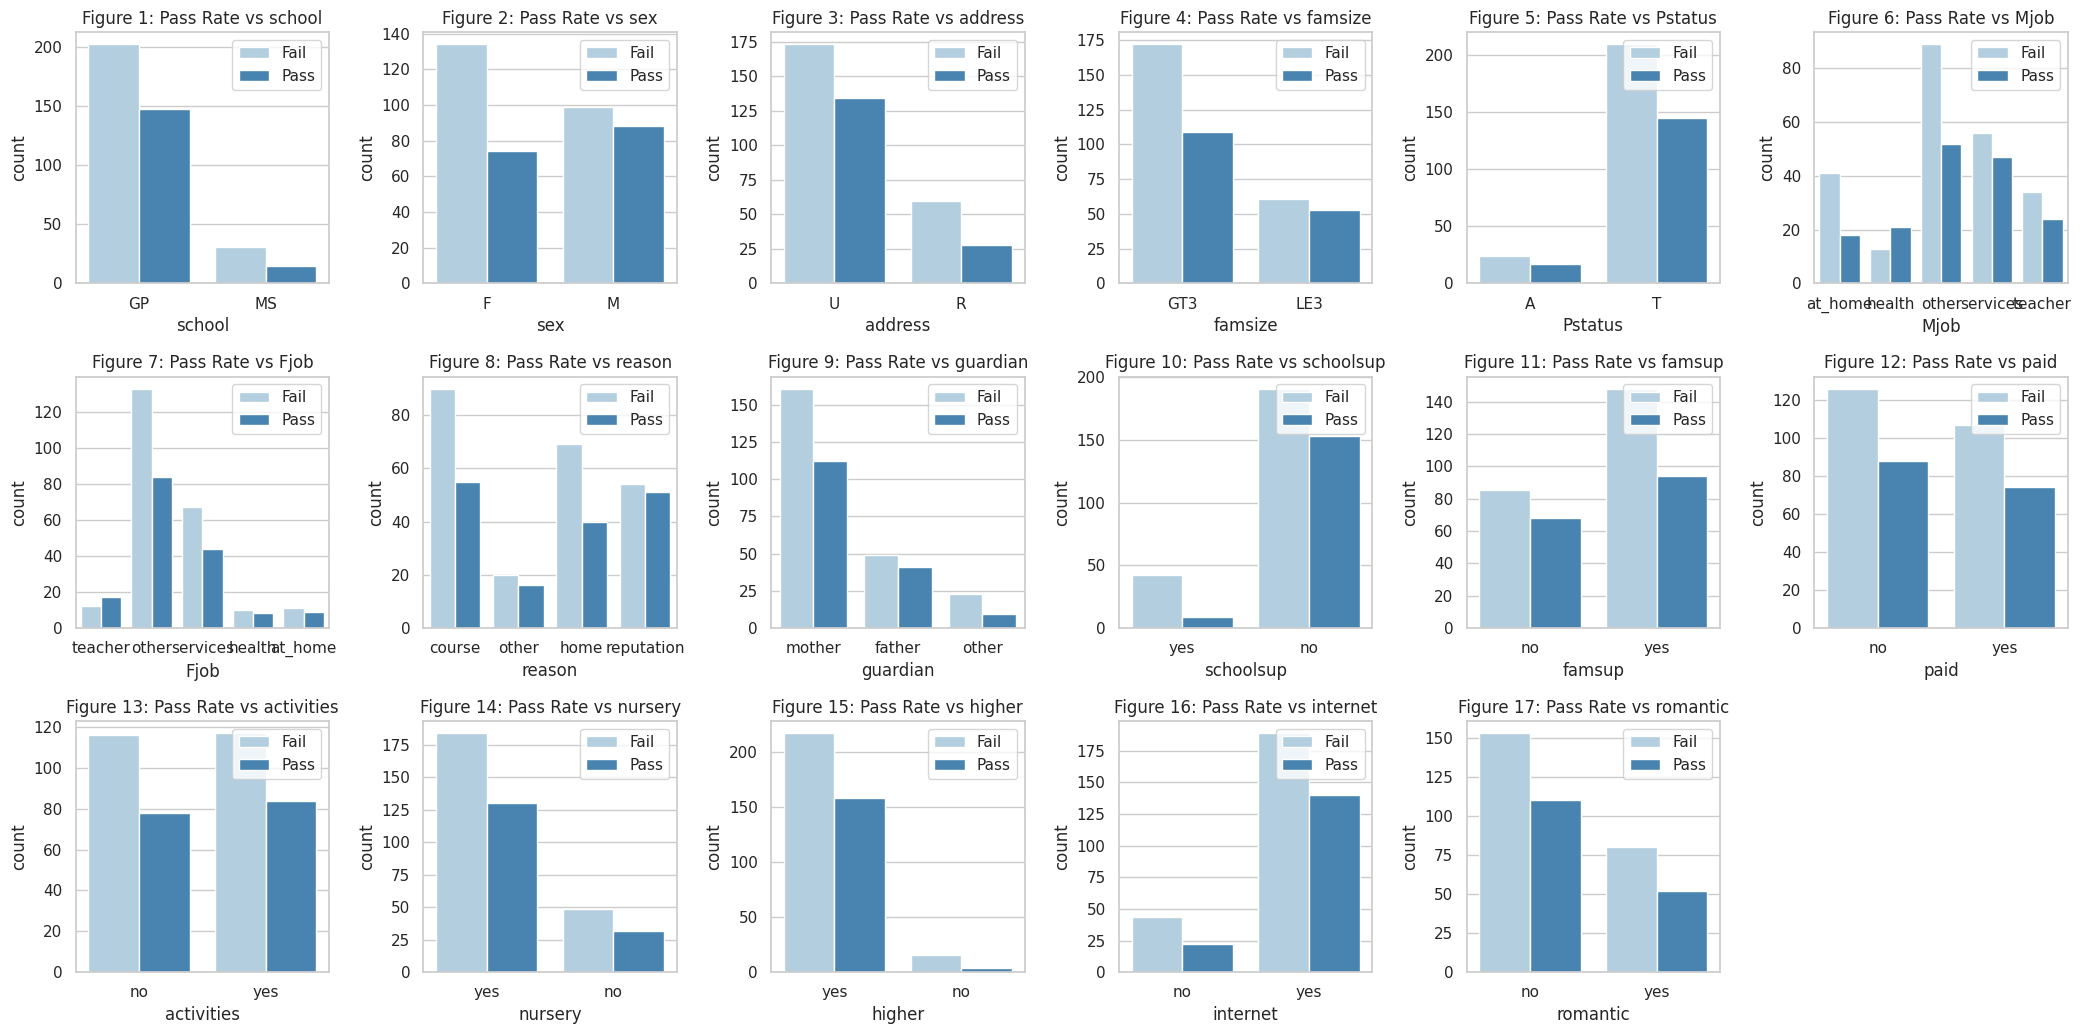

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

n_rows = 3
n_cols = 6

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data=df, x=cols[i], hue='Grade_status', palette='Blues', ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Pass Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Fail', 'Pass'])

# Remove last subplot
ax.flat[-1].set_visible(False)

plt.tight_layout()
plt.show()

# **2. Data Preprocessing**

## **2.1. Encode categorical data into numerical**

In [ ]:
# Change data type
# 0 stands for U and 1 stands for R. [U=Urban, R=Rural]
# Here we will convert all the binary columns to integers.
df['Address'] = df['address'].apply(lambda x: 0 if x == 'U' else 1)
df['Address'].value_counts()
# Interestingly there are more students in families that are greater than 3.
# Could it be possible that all family members are in the same school? This might be a reason why it is higher.
# LE3 = Less than 3. [0], GE3 = Greater than 3.[1]
df['Famsize'] = df['famsize'].apply(lambda x: 0 if x == 'LE3' else 1)
df['Famsize'].value_counts()
# T = Parents are living together [0], A = Parents living apart. [1]
df['Status'] = df['Pstatus'].apply(lambda x: 0 if x == 'T' else 1)
df['Status'].value_counts()
# 0 = no and 1 = yes
df['FamSupport'] = df['famsup'].apply(lambda x: 0 if x == 'no' else 1)
df['FamSupport'].value_counts()
# 0 = no and 1 = yes
# This is an interesting column when it comes to having a positive effect on G3.
df['ExtraClass'] = df['paid'].apply(lambda x: 0 if x == 'no' else 1)
df['ExtraClass'].value_counts()
# 0 = no and 1 = yes
df['Activities'] = df['activities'].apply(lambda x: 0 if x == 'no' else 1)
df['Activities'].value_counts()
# 0 = no and 1 = yes
# It has a high correlation however, we only have 20 students that are not interested in having a high education and
# thus this column should not be taken into consideration.
df['HigherEdu'] = df['higher'].apply(lambda x: 0 if x == 'no' else 1)
# continue with the analisis.
df['Internet'] = df['internet'].apply(lambda x: 0 if x == 'no' else 1)
# Interestingly when people are not in a romantic relationship they tend to get better grades.
df['Relationships'] = df['romantic'].apply(lambda x: 0 if x == 'no' else 1)
df['Nursery'] = df['nursery'].apply(lambda x: 0 if x == 'no' else 1)
df['Guardian'] = df['guardian'].apply(lambda x: 0 if x == 'mother' else (1 if x=='father' else 2))
# Does not have any effect on G3. Low correlation.
df['Reason'] = df['reason'].apply(lambda x: 0 if x == 'home' else (1 if x=='reputation' else (2 if x=='course' else 3)))
# Does not have any effect on G3. Low correlation.
df['School'] = df['school'].apply(lambda x: 0 if x == 'GP' else 1)
df['SchoolSupport'] = df['schoolsup'].apply(lambda x: 0 if x == 'no' else 1)
df['Sex'] = df['sex'].apply(lambda x: 0 if x == 'F' else 1)


## **2.2. Drop column**

#### Calculate the correlation coefficient

In [ ]:
new_corr = df.corr()
new_corr['G3'].sort_values(ascending=False)

<ipython-input-9-9e620d73ae26>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_corr = df.corr()


G3               1.000000
G2               0.904868
G1               0.801468
Medu             0.217147
HigherEdu        0.182465
Fedu             0.152457
Sex              0.103456
ExtraClass       0.101996
Internet         0.098483
studytime        0.097820
Status           0.058009
Nursery          0.051568
famrel           0.051363
absences         0.034247
Activities       0.016100
freetime         0.011307
Reason          -0.028738
FamSupport      -0.039157
School          -0.045017
Walc            -0.051939
Guardian        -0.054193
Dalc            -0.054660
health          -0.061335
Famsize         -0.081407
SchoolSupport   -0.082788
Address         -0.105756
traveltime      -0.117142
Relationships   -0.129970
goout           -0.132791
age             -0.161579
failures        -0.360415
Name: G3, dtype: float64

#### Drop column

In [ ]:
df = df.drop(['sex', 'Pstatus', 'Mjob', 'Fjob', 'school', 'School', 'address','Address' , 'famsize', 'Famsize', 'Status', 'reason', 'Reason', 'guardian', 'Guardian', 'famsup', 'paid', 'activities', 'Activities', 'nursery', 'Nursery', 'higher', 'internet', 'romantic', 'freetime', 'traveltime','schoolsup', 'Dalc',  'Walc', 'G3'], axis=1)

#### Rename

In [ ]:
# Rename the columns
df = df.rename(columns={'Medu': 'MomEdu', 'Fedu': 'DadEdu', 'studytime': 'Studytime', 'famrel': 'FamRelationship', 'health': 'Health', 'goout': 'GoOut', 'age': 'Age', 'failures': 'Failures', 'absences': 'Absences'})
df.columns

Index(['Age', 'MomEdu', 'DadEdu', 'Studytime', 'Failures', 'FamRelationship',
       'GoOut', 'Health', 'Absences', 'G1', 'G2', 'Grade_status', 'FamSupport',
       'ExtraClass', 'HigherEdu', 'Internet', 'Relationships', 'SchoolSupport',
       'Sex'],
      dtype='object')

 # **3. Model Selection**

## **3.1. Feature Selections**

In [ ]:
features = ['DadEdu','MomEdu','HigherEdu', 'ExtraClass','Internet', 'Studytime','FamRelationship','Absences','FamSupport','Health','SchoolSupport','Relationships','GoOut','Age','Failures','Sex', 'G1', 'G2']

In [ ]:
X = df[features]
y = df['Grade_status']

In [ ]:
X.head()

,DadEdu,MomEdu,HigherEdu,ExtraClass,Internet,Studytime,FamRelationship,Absences,FamSupport,Health,SchoolSupport,Relationships,GoOut,Age,Failures,Sex,G1,G2
0,4,4,1,0,0,2,4,6,0,3,1,0,4,18,0,0,5,6
1,1,1,1,0,1,2,5,4,1,3,0,0,3,17,0,0,5,5
2,1,1,1,1,1,2,4,10,0,3,1,0,2,15,3,0,7,8
3,2,4,1,1,1,3,3,2,1,5,0,1,2,15,0,0,15,14
4,3,3,1,1,0,2,4,4,1,5,0,0,2,16,0,0,6,10


In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Grade_status, dtype: category
Categories (2, int64): [0, 1]

## **3.2. Split the dataset - Train và Test**

In [ ]:
#importing library for spliting data
from sklearn.model_selection import train_test_split

In [ ]:
#spliting of data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.8, test_size=0.2, random_state=0)

In [ ]:
# Check the result after splitting
X.shape, X_train.shape, X_test.shape,  y.shape, y_train.shape, y_test.shape

((395, 18), (316, 18), (79, 18), (395,), (316,), (79,))

## **3.3. Baseline Model Comparition**

In [ ]:
pip install xgboost

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

seed =2023

models = [
    LinearSVC(random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encode=False, eval_metric='logloss', random_state=seed)
]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

[07:36:58] WARNING: ../src/learner.cc:767: 
Parameters: { "use_label_encode" } are not used.

[07:36:58] WARNING: ../src/learner.cc:767: 
Parameters: { "use_label_encode" } are not used.

[07:36:58] WARNING: ../src/learner.cc:767: 
Parameters: { "use_label_encode" } are not used.

[07:36:58] WARNING: ../src/learner.cc:767: 
Parameters: { "use_label_encode" } are not used.

[07:36:58] WARNING: ../src/learner.cc:767: 
Parameters: { "use_label_encode" } are not used.

[07:36:58] WARNING: ../src/learner.cc:767: 
Parameters: { "use_label_encode" } are not used.

[07:36:58] WARNING: ../src/learner.cc:767: 
Parameters: { "use_label_encode" } are not used.

[07:36:59] WARNING: ../src/learner.cc:767: 
Parameters: { "use_label_encode" } are not used.

[07:36:59] WARNING: ../src/learner.cc:767: 
Parameters: { "use_label_encode" } are not used.

[07:36:59] WARNING: ../src/learner.cc:767: 
Parameters: { "use_label_encode" } are not used.

[07:36:59] WARNING: ../src/learner.cc:767: 
Parameters: { "u

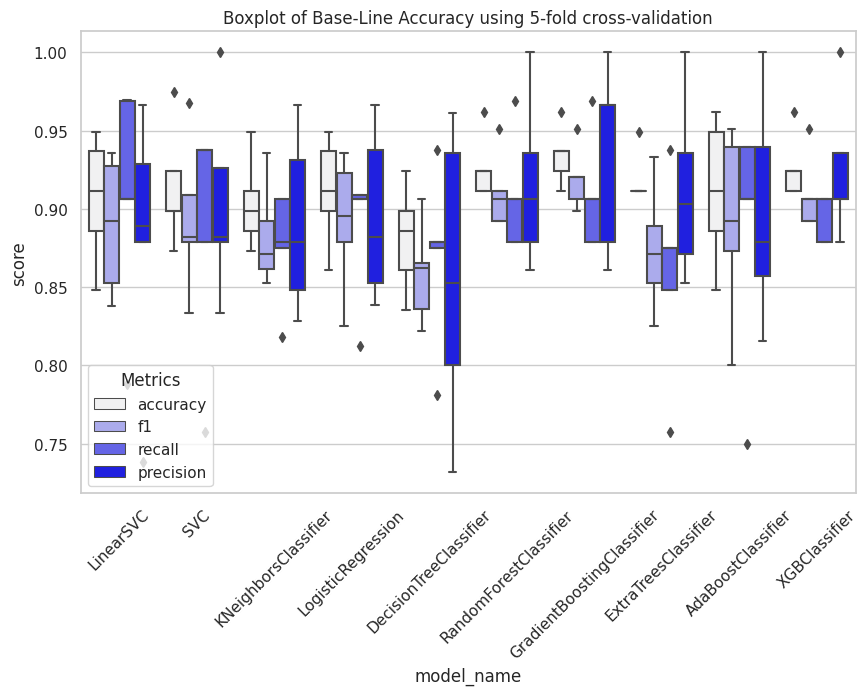

,Accuracy Mean,F1 Mean,Recall Mean,Precision Mean
model_name,,,,
GradientBoostingClassifier,0.934177,0.919378,0.934646,0.907765
RandomForestClassifier,0.926582,0.910690,0.916327,0.907765
XGBClassifier,0.926582,0.909587,0.925354,0.895265
ExtraTreesClassifier,0.918987,0.874306,0.912524,0.858712
SVC,0.913924,0.894261,0.904080,0.889773
LogisticRegression,0.911392,0.891654,0.895634,0.888636
AdaBoostClassifier,0.911392,0.891152,0.898223,0.888258
LinearSVC,0.906329,0.889125,0.880202,0.907765
KNeighborsClassifier,0.903797,0.882648,0.890709,0.876894


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, precision_score

# Define the metrics you want to calculate
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
}

def generate_baseline_results(models, X, y, scoring_metrics, cv=5, plot_results=False):
    seed = 2023  # Đặt seed ngẫu nhiên theo mong muốn
    kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
    entries = []

    for model in models:
        model_name = model.__class__.__name__
        for metric_name, scorer in scoring_metrics.items():
            scores = cross_val_score(model, X, y, scoring=scorer, cv=kfold)
            for fold_idx, score in enumerate(scores):
                entries.append((model_name, fold_idx, metric_name, score))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'metric_name', 'score'])

    if plot_results:
        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='model_name', y='score', hue='metric_name', color='blue', data=cv_df)
        plt.title('Boxplot of Base-Line Accuracy using 5-fold cross-validation')
        plt.xticks(rotation=45)
        plt.legend(title='Metrics')
        plt.show()

    # Summarize results
    metric_mean = cv_df.groupby(['model_name', 'metric_name'])['score'].mean().unstack()
    baseline_results = pd.concat([metric_mean], axis=1, ignore_index=True)
    baseline_results.columns = ['Accuracy Mean', 'F1 Mean', 'Recall Mean', 'Precision Mean']

    # sort by accuracy
    baseline_results.sort_values(by=['Accuracy Mean'], ascending=False, inplace=True)

    return baseline_results

generate_baseline_results(models, X, y, scoring_metrics, cv=5, plot_results=True)


# **4. Training Machine Learning Model and Evaluation**

## **4.1. GradientBoostingClassifier**

In [ ]:
# Define the GradientBoostingClassifier model
gb_model = GradientBoostingClassifier(random_state=seed)

# Train the model on the training set
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)
y_pred_gb


array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.94      0.97      0.96        34

    accuracy                           0.96        79
   macro avg       0.96      0.96      0.96        79
weighted avg       0.96      0.96      0.96        79



## **4.2. RandomForestClassifier**

In [ ]:
# Define the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=seed)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
print (classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.94      0.97      0.96        34

    accuracy                           0.96        79
   macro avg       0.96      0.96      0.96        79
weighted avg       0.96      0.96      0.96        79



## **4.3. XGBClassifier**

In [ ]:
# Define the XGBClassifier model
xgb_model = XGBClassifier(random_state=seed)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb


array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
print (classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        45
           1       0.94      0.94      0.94        34

    accuracy                           0.95        79
   macro avg       0.95      0.95      0.95        79
weighted avg       0.95      0.95      0.95        79

